## Import Packages

In [71]:
import os
import tarfile
import urllib
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## Fetch Data from URL

In [72]:
def fetch_tgz_url (url, dest_path):
    os.makedirs(dest_path, exist_ok = True) # Makes directory for the raw data
    timestamp = datetime.now().isoformat(timespec='minutes').replace(":", "")
    tgz_path = os.path.join(dest_path, "data_" + timestamp + '.tgz') # Creates a destination path and filename
    urllib.request.urlretrieve(url, tgz_path) # Requests the information from the remote server 
    tgz = tarfile.open(tgz_path) # opens the file and saves the data into the variable
    tgz.extractall(path = dest_path) # Extracts the tarballed data into the new data folder
    tgz.close() # Closes the tarballed file but keeps the extracted data in memory 
    display(HTML("Fetch complete with no errors. Downloaded data saved as " + tgz_path))
    return timestamp

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DEST_PATH = os.path.join("datasets", "housing")
URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
CSV_NAME = "housing.csv"
HOME_DIR = os.getcwd()
TIMESTAMP = fetch_tgz_url(URL, DEST_PATH)



## Organize Downloaded Data

In [73]:
def catalogue_dataset (dest_path = DEST_PATH, home_dir = HOME_DIR, csv_name = CSV_NAME, timestamp = TIMESTAMP):
    os.chdir(home_dir)
    new_csv = CSV_NAME.replace('.csv', '_' + timestamp + '.csv')
    os.chdir(dest_path)
    if csv_name in (os.listdir()):
        os.rename(csv_name, new_csv)
    os.chdir(home_dir)
    return new_csv

csv = catalogue_dataset()
display(HTML(CSV_NAME + ' has been renamed ' + csv + ' in ' + DEST_PATH))

## Preview Data

In [74]:
def set_id (df_temp):
    data = df_temp
    import string
    data['id'] = data.index * np.random.randint(1,1000) * 19 + np.random.randint(1,1000)
    return data

def load_raw_data(dest_path, csv_name):
    csv_path = os.path.join(dest_path, csv_name) # specifies the filepath to the extracted data (csv file)
    data = pd.read_csv(csv_path) # returns a dataframe of the csv file
    return data


df_orig = load_raw_data(DEST_PATH, csv)
df = df_orig.copy()
if 'id' not in df.columns:
    df = df_orig.reset_index()
    df = set_id(df) # Create unique identifier across updates
    df = df.set_index('id') 
    df = df.drop('index', axis = 1)
   
display(HTML("<br>" + df.head().to_html() + '<br><hr>')) # index = index
display(HTML(str(df.info()) + "<hr><br>"))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
id,,,,,,,,,,
702,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
3400,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
6098,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
8796,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
11494,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 702 to 55684724
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Find out Which categories exist and how many in each

In [75]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Find out more about the other fields in the dataset

In [76]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### By Proximity to the ocean

In [77]:
df.groupby("ocean_proximity").describe()

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND          -118.3200 -118.32      5.0  33.358000  ...      2.833300   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  ...      5.054425   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  ...      4.837400   

                         median_house_value                                \
                     max              count           mean            std   
ocean_proximity                                                             
<1H OCEAN        15.0001             9136.0  240084.285464  106124.292213   
INLAND           15.0001             6551.0  124805.392001   70007.908494   
ISLAND            3.3906                5.0  380440.000000   80559.561816   
NEAR BAY         15.0001             2290.0  259212.311790  122818.537064   
NEAR OCEAN       15.0001             2658.0  249433.977427  122477.145927   

                                                                   
                      min       25%       50%       75%       max  
ocean_proximity                                                    
<1H OCEAN         17500.0  164100.0  214850.0  289100.0  500001.0  
INLAND            14999.0   77500.0  108500.0  148950.0  500001.0  
ISLAND           287500.0  300000.0  414700.0  450000.0  450000.0  
NEAR BAY          22500.0  162500.0  233800.0  345700.0  500001.0  
NEAR OCEAN        22500.0  150000.0  229450.0  322750.0  500001.0  

[5 rows x 72 columns]

## Histograms of entire dataset

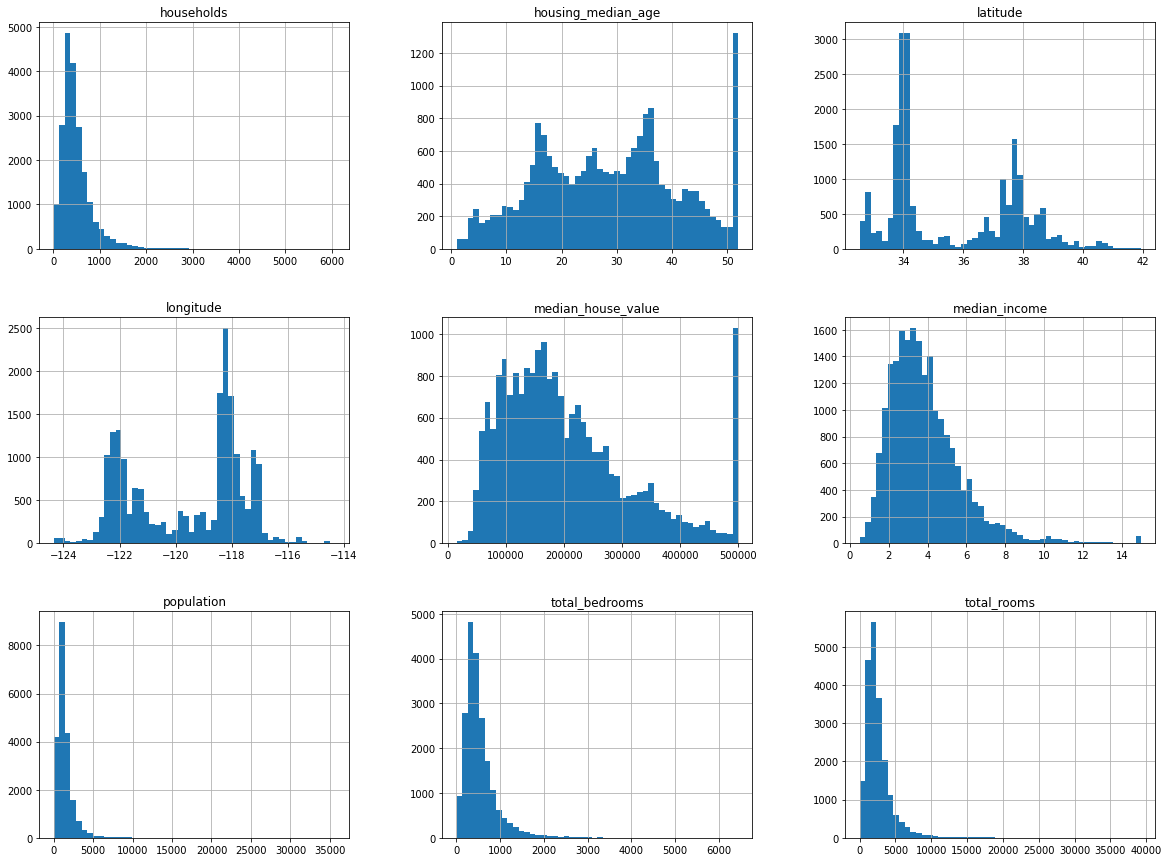

In [78]:
%matplotlib inline
full_hist = df.hist(bins = 50, figsize = (20,15))

#### Some of these are very tail heavy and will need to be transformed (i.e. log) in the cleaning process

## Split the data into Training and Test Sets Manually

In [79]:
def split_train_test(data, test_ratio):
    np.random.seed(17) # ensures that each run, the indices of the test/train sets are not changing
    shuffled = np.random.permutation (len(data))
    test_size = int(len(data) * test_ratio)    
    test_ind = shuffled[:test_size]
    train_ind = shuffled[test_size:]
    test_set = data.iloc[test_ind]
    train_set = data.iloc[train_ind]
    test_set.to_csv('test_set.csv')
    train_set.to_csv('train_set.csv')
    return train_set, test_set


train_set, test_set = split_train_test(df, 0.2)
display(HTML("Length of Training Set = " + str(len(train_set))))
display(HTML("Length of Testing Set = " +  str(len(test_set))))

## Split the data into Training and Test Sets with SciKitLearn and ramdom sampling

In [80]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split (df, test_size = 0.2, random_state = 17)
display(HTML("Length of Training Set = " + str(len(train_set))))
display(HTML("Length of Testing Set = " +  str(len(test_set))))

## Update the training and test sets 

In [81]:
from zlib import crc32

def test_set_check (identifier, test_ratio):
    """ Computes a CRC (Cyclic Redundancy Check) checksum of data
        crc32(np.int64(identifier)) & 0xffffffff generate the same 
        numeric value across all Python versions and platforms"""
    hash_check = crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32 # < 20% of hash's max value
    return hash_check
    
def split_train_update(data, test_ratio, identifier):
    ids = data[identifier]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    test_set = data.loc[in_test_set]
    train_set = data.loc[~in_test_set]
    test_set.to_csv('test_set.csv')
    train_set.to_csv('train_set.csv')
    return train_set, test_set

#************* requires ID column to be callable - not as index ***************#
df_splt = df.reset_index()
train_set, test_set = split_train_update(df_splt, 0.2, 'id')
display(HTML("Length of Training Set = " + str(len(train_set))))
display(HTML("Length of Testing Set = " +  str(len(test_set))))
display(HTML(train_set.head().to_html()))

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,3400,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,6098,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,8796,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
5,14192,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,16890,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


## Stratify the population

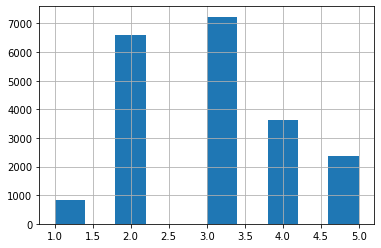

In [82]:
df['income_category'] = pd.cut(df.median_income, bins = (0, 1.5, 3.0, 4.5, 6, np.inf), labels = (1, 2, 3, 4, 5)) # X 1000
income_hist_strat = df.income_category.hist()

## Perform Stratified Sampling and compare to overall data and random sampling

,overall,stratified,random,rand_p_err,strat_p_err
1,0.039826,0.039729,0.040213,-0.973236,0.243309
2,0.318847,0.318798,0.324370,-1.732260,0.015195
3,0.350581,0.350533,0.358527,-2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,-0.027480
5,0.114438,0.114583,0.109496,4.318374,-0.127011


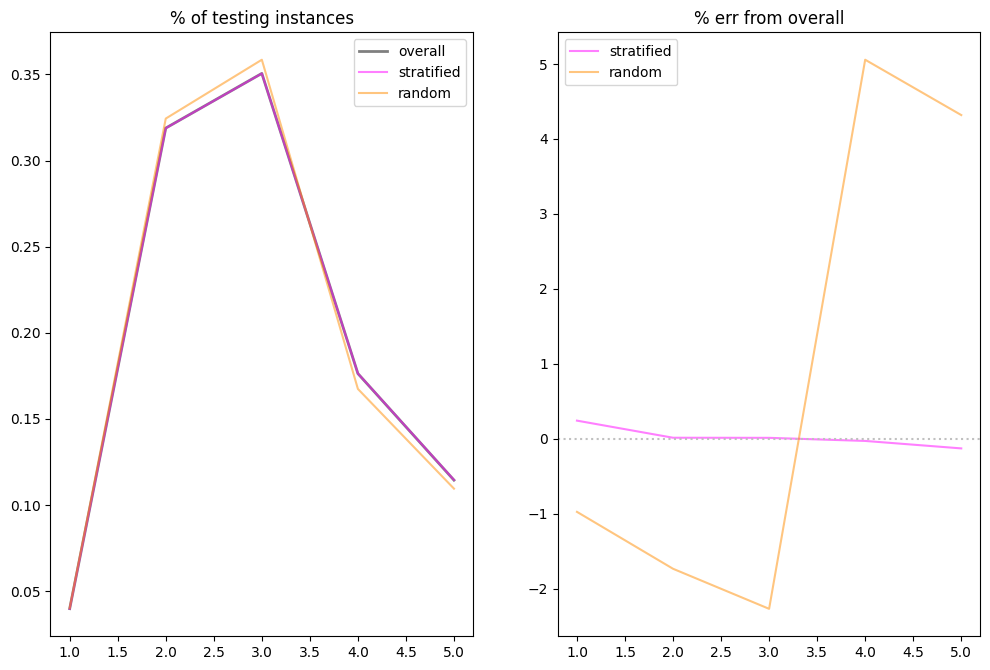

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
def compare_sampling(df_temp, label):
    """Compare stratified and random sampling for the given dataset based on the 
        user-specified label. Compares proportion of representative samples in each 
        category (1-5) with % error comparing actual distribution to distribution in
        test sets. The closer the two, the more representative the test set. """
    
    data = df_temp.copy()
    
    # Stratified sampling
    split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
    for train_index, test_index in split.split(data, data[label]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]

    # Pure Random sampling
    split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(data, data[label]):
        rand_train_set = data.loc[train_index]
        rand_test_set = data.loc[test_index]

    # Prepare a table of the results
    t = pd.DataFrame()
    t['overall'] = data[label].value_counts()/len(data.median_income)
    t['stratified'] = strat_test_set[label].value_counts()/len(strat_test_set.median_income)
    t['random'] = rand_test_set[label].value_counts()/len(rand_test_set.median_income)
    t['rand_p_err'] = 100 * (t.overall - t.random)/ t.overall
    t['strat_p_err'] = 100 * (t.overall - t.stratified)/ t.overall
    t = t.sort_index()
    display(HTML(t.to_html()))

    fig, ax = plt.subplots(1,2, figsize = (12,8), dpi = 100)
    ax[0].plot(t.index.values, t['overall'], alpha = 0.5, label = 'overall', color = 'black', lw = 2)
    ax[0].plot(t.index.values, t['stratified'], alpha = 0.5, label = 'stratified', color = 'magenta')
    ax[0].plot(t.index.values, t['random'], alpha = 0.5, label = 'random', color = 'darkorange')
    handles, labels = ax[0].get_legend_handles_labels()
    sampling_plot0 = ax[0].legend(handles, labels)
    ax[0].set_title ('% of testing instances')
    
    ax[1].plot(t.index.values, t['strat_p_err'], alpha = 0.5, label = 'stratified', color = 'magenta')
    ax[1].plot(t.index.values, t['rand_p_err'], alpha = 0.5, label = 'random', color = 'darkorange')
    handles, labels = ax[1].get_legend_handles_labels()
    sampling_plot1 = ax[1].legend(handles, labels)
    ax[1].axhline(0, ls = ':', color = 'silver')
    ax[1].set_title ('% err from overall')
    
    ## Remove Category for Stratification from the dataset
    for set_ in (strat_train_set, strat_test_set):
        set_.drop(label, axis = 1, inplace = True)
        
    return strat_train_set, strat_test_set, rand_train_set, rand_test_set


#************* requires ID column to be callable - not as index ***************#
df = df.reset_index()
strat_train_set, strat_test_set, rand_train_set, rand_test_set = compare_sampling(df, 'income_category')

## Set the test set aside and if needed, make a smaller exploration set

In [85]:
df_train = strat_train_set.copy()
df_train = df_train.set_index('id')
#df_train = df_train.drop('index', axis = 1)
display(HTML(df_train.head().to_html()))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
id,,,,,,,,,,
47501690,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
50269838,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
39526402,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
8715242,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
9592092,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## Visualize the data 

Int64Index([47501690, 50269838, 39526402,  8715242,  9592092, 52557742,
            23956244, 36922832, 13320728, 13115680,
            ...
            41199162, 10128994, 32824570, 16196796, 19868774, 17707676,
            32519696, 37524486, 30107684, 42561652],
           dtype='int64', name='id', length=16512)


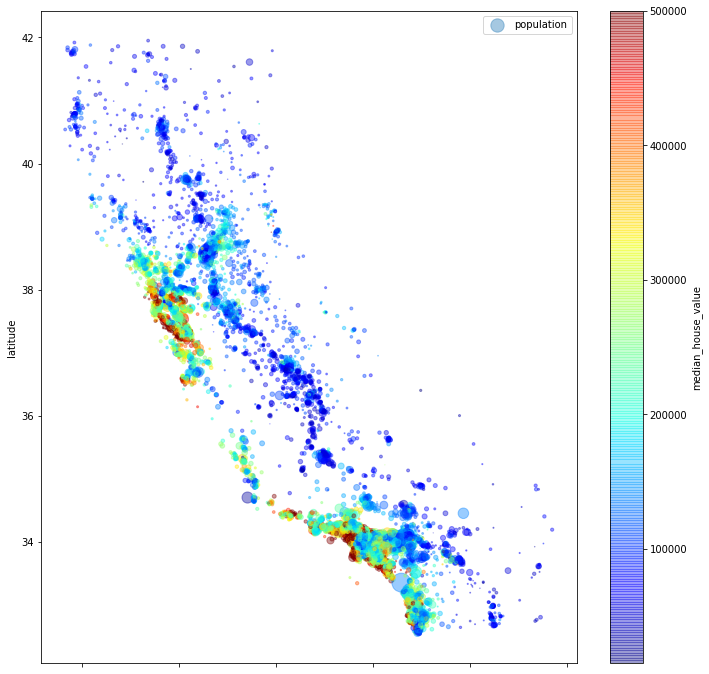

In [86]:
# In this case, geography is important and we're most interested in median income and home value
df_train.plot (kind = 'scatter', x = 'longitude', y = 'latitude', 
               alpha = 0.4, figsize = (12,12), s = df_train.population/100, 
               label = 'population', c = 'median_house_value', cmap = plt.get_cmap('jet'), 
               colorbar = True) 
plt.legend()
print(df_train.index)

Clustering would be good for:
- northern vs southern clusters
- high home values vs not
- add new features based on how close to main clusters they are

## Look for correlations in the data

In [87]:
# Check for linear correlations
corr_matrix = df_train.corr()
print(df_train.corr().median_house_value.sort_values(ascending = False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


#### From these choose the potentially most meaningful ones and plot a scatter matrix
- median income
- total_rooms
- housing_median_age



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa2bb50>,
      dtype=object)

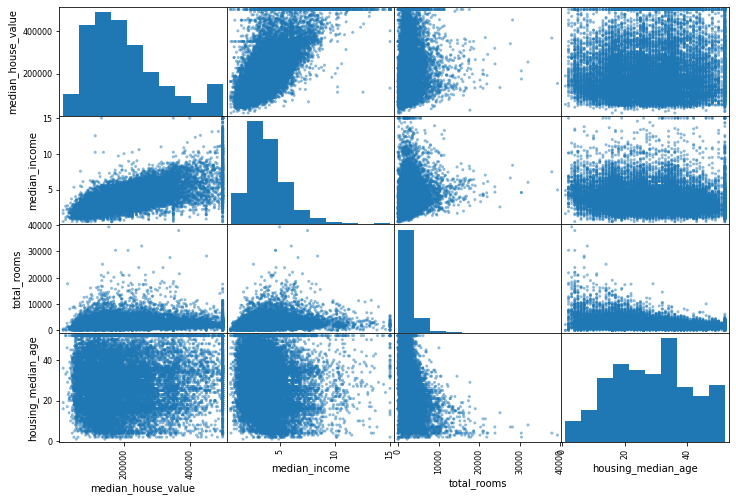

In [88]:
]


- inversion matix is itself and will just be a histogram
- All other vectors are xy correlelogram
- of these the closest relationship is median_house_value and median_income

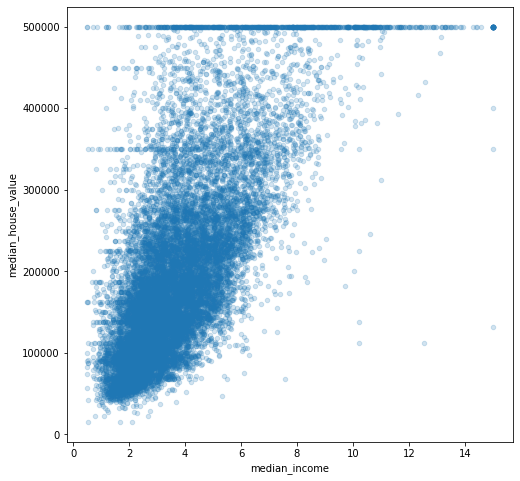

In [89]:
df_train.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.2, figsize = (8,8))

#### Things to note:
- strong correlation
- horizontal bands at 500k, 450k, 350k, 280k, 125k 
  - May want to try removing the corresponding districts to prevent the algorithms from learning these quirks
  - Add this to the list of cleaning tasks


## Add additional parameters that may be of interest

In [90]:
df["rooms_per_household"] = df.total_rooms/df.households
df["bedrooms_per_room"] = df.total_bedrooms/df.total_rooms
df["population_per_household"] = df.population/df.households
corr_matrix = df.corr()
print(corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
id                          0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


#### Things to note:
- This is an iterative process exploring the data and coming up with new relationships
- Rooms per household turns out to be a pretty big deal - the more rooms the more expensive it is
- The fewer bedrooms per room the more affordable it is (kinda the same thing but may be nuanced
  - what percentage of rooms are not bedrooms?
                                                         



## Clean the Data

#### Make a copy to protect original Data
- Separate out the predictors from the labels
- Labels = target values we are calculating
- Predictors = all the other variables in the dataset (at this point)
- This prevents applying the same transformations to the predictors and to the target values

In [91]:
df_train = strat_train_set.drop("median_house_value", axis=1) # Axis = 1 means column
df_labels = strat_train_set.median_house_value.copy()

#### Handle missing values
- Option1 - Remove the bad rows
- Option2 - Remove the whole attribute 
- Option3 - Set missing values to a new value
- Option4 - Impute missing values

In [92]:
opt1 = df_train.dropna(subset = ["total_bedrooms"])
opt2 = df_train.drop('total_bedrooms', axis = 1)

medians = df_train.median()
medians.to_csv('medians.csv') # save to add back to test and production sets
opt3 = df_train.fillna(medians, inplace = True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# Remove text columns
df_train_nums = df_train.drop("ocean_proximity", axis = 1) 
df_train_nums = df_train_nums.set_index('id')
imputer.fit (df_train_nums)
i = 0
for col in df_train_nums.columns:
    print(df_train_nums.columns.values[i], " = " + str(imputer.statistics_[i]))
    i = i + 1
# Transform the dataset with the imputed values
X = imputer.transform(df_train_nums) # numpy array
df_train_imp = pd.DataFrame(X, columns = df_train_nums.columns, index = df_train_nums.index)
display(HTML(df_train_imp.head().to_html()))

longitude  = -118.51
latitude  = 34.26
housing_median_age  = 29.0
total_rooms  = 2119.5
total_bedrooms  = 433.0
population  = 1164.0
households  = 408.0
median_income  = 3.5408999999999997


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
id,,,,,,,,
47501690,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
50269838,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
39526402,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
8715242,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
9592092,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


#### Handle Text Data with transformers

In [93]:
from sklearn.preprocessing import OrdinalEncoder
# First way to get a 2D array
cat = df_train.ocean_proximity
cat = cat.reset_index()

# Second way to get a 2D array
cat = df_train[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(cat)
print ("Categorically Encoded Data:")
print(cat_encoded[:10])

# Normal Encdoing
i = 0
# categories list has a hidden dimension (index)[category_text]
print('')
print("Numerically encoded categorical data:")
for ct in ordinal_encoder.categories_[0]: 
    print(i, ct)
    i = i + 1

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_hot = cat_encoder.fit_transform(cat)

print('')
print(type(cat_hot[0])) # Numpy sparse away to save memory
print(type(cat_hot.toarray())) # Normal (Dense) Numpy array
i = 0
print('')
print("One-hot encoded categorical data:")
for ct in cat_encoder.categories_[0]: 
    print(i, ct)
    i = i + 1

Categorically Encoded Data:
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]

Numerically encoded categorical data:
0 <1H OCEAN
1 INLAND
2 ISLAND
3 NEAR BAY
4 NEAR OCEAN

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>

One-hot encoded categorical data:
0 <1H OCEAN
1 INLAND
2 ISLAND
3 NEAR BAY
4 NEAR OCEAN


#### Build custom transformers

In [94]:
# Add new attributes like above
from sklearn.base import BaseEstimator, TransformerMixin

print("Column list: \n")
i = 0
for col in df_train.columns:
    print (i, col)
    i = i + 1
rooms_i, bedrooms_i, population_i, households_i = 3,4,5,6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__ (self, add_bedrooms_per_room = True): 
        # One hyperparameter: add_bedrooms_per_room
        # Sensible default = True
        self.add_bedrooms_per_room = add_bedrooms_per_room #true/false
        
    def fit(self, X, y = None):
        return self
    
    def transform (self, X): 
        # The actual work
        # X is your data set passed by calling the instance of this class and this fn
        # i.e. attr_adder is an instance of the CombinedAttributeAdder class
        # The dataset is passed to the transformer with attr_adder.transform(dataset)
        # X subsetting requires the comma to separate rows and columns or you get an error
        rooms_per_household = X[:, rooms_i]/X[:, households_i]
        population_per_household = X[:,population_i] / X[:,households_i]
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:,bedrooms_i] / X[:, rooms_i]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Assign the working value of the hyperparameter
add_bedrooms_per_room = False

# Create an instance of the CombinedAttributesAdder class
attr_adder = CombinedAttributesAdder (add_bedrooms_per_room)

# Run the transformer by passing the values of your training set
housing_extra_attribs = attr_adder.transform(df_train.values)

print('')
print("New array has " + str(housing_extra_attribs.shape[0]) +     
      " and " + str(housing_extra_attribs.shape[1]) + " columns.") 

# Convert the new numpy array back to a dataframe named df_train2 
# The number of columns depends on whether or not the hyperparameter was set to True or False
if add_bedrooms_per_room == True :
    cols = list(df_train.columns) + ['rooms_per_household', 'population_per_household','bedrooms_per_room']
else: 
    cols = list(df_train.columns) + ['rooms_per_household', 'population_per_household']
df_train2 = pd.DataFrame(housing_extra_attribs, columns = cols)
df_train2 = df_train2.set_index('id')
display (HTML(df_train2.head().to_html()))

# checking to make sure row ID is still accurate (unique)
print(df_train2.shape, np.unique(len(df_train2.index)))

Column list: 

0 id
1 longitude
2 latitude
3 housing_median_age
4 total_rooms
5 total_bedrooms
6 population
7 households
8 median_income
9 ocean_proximity

New array has 16512 and 12 columns.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
id,,,,,,,,,,,
47501690,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,0.0535211,0.494366
50269838,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,0.0457516,0.352941
39526402,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,0.0331197,0.503205
8715242,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,0.0171233,0.25411
9592092,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,0.00381251,0.342005


(16512, 11) [16512]


#### Hyperparameter Turning
- Use hyperparameters (like add_bedrooms_per_room) with sensible default values 
- Allows combinations of hyperparameters that can be autimatically tried out to get the best result
- Very Timesaving
- Maybe set a loop with different conditions in arrays and compare them to a predefinted metric? RMSE maybe?


#### Feature Scaling
- Min-Max Scaling (Normalization): MinMaxScaler(feature_range = (0,1)
- Standardization: StandardScaler()

#### Transformation Pipelines
- Multiple transformations can be squenced into pipelines

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # Not used here (for reference)

# Pipeline for numeric data only
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

train_nums_xfm = num_pipeline.fit_transform(df_train_nums)
cols = list(df_train_nums.columns) + ['rooms_per_household', 'population_per_household','bedrooms_per_room']
df_pipe = pd.DataFrame(train_nums_xfm, columns = cols, index = df_train_nums.index) 

display(HTML(df_pipe.head().to_html()))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
id,,,,,,,,,,,
47501690,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
50269838,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
39526402,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
8715242,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
9592092,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928


#### Transform all columns with ColumnTransformer
- Requires 2 pipelines that have already been defined
    - One numerical pipeline
    - One categorical pipeline
- Requires 2 lists of column names 
    - One with the names of the numerical columns
    - One with the names of the categorical columns

In [97]:
from sklearn.compose import ColumnTransformer

df_xfms = df_train.copy()

if 'id' in df_xfms.columns:
    df_xfms = df_xfms.set_index('id')
if 'ocean_proximity' in df_xfms.columns:
    num_attribs = list(df_xfms.drop('ocean_proximity', axis = 1))
else:
    num_attribs = list (df_xfms)

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # numerical pipeline
    ("cat", OneHotEncoder(), cat_attribs), # categorical pipeline
])

prep = full_pipeline.fit_transform(df_xfms)
cols = list(df_xfms.columns) + ['rooms_per_household', 'population_per_household','<1H OCEAN', 'INLAND', 
    'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
df_prep = pd.DataFrame(prep, columns = cols, index = df_xfms.index)
display(HTML(df_prep.head().to_html()))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
id,,,,,,,,,,,,,,,,
47501690,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
50269838,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
39526402,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
8715242,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
9592092,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0


## Select and Train a Model

## Train on a Linear regreesion model

In [114]:
from sklearn.linear_model import LinearRegression
import joblib

lin_reg = LinearRegression()
lin_reg.fit(df_prep, df_labels)
print(df_prep.columns, df_id.columns)
some_data = df_train.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object') Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


/Users/haleyspeed/git/ml/ml_env/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


## Measure Model's RMSE

In [100]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(df_prep) # Full set this time
lin_mse = mean_squared_error(df_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse) ## Way underfitted

68628.19819848923


## Train on a Decision Tree Regressor
- finds complex non-linear relationships in the data

In [101]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prep, df_labels)
predictions = tree_reg.predict(df_prep)
tree_mse = mean_squared_error(df_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse) ## Way overfitted

0.0


## Cross-Validation 
- Split training group into a subset for exploratory training/fitting
- Could use train_test_split() a second time
- Could use scikit-Learn's K-fold cross-walidation features
    - Splits the data into 10 distinct subsets called folds, trains and evaluates the decision Tree model 10 times, picking a difiggerent fold for evaluation every time and training on the other 9 folds. 
    - Get 10 Evaluation Scores
    - Utility function rather than cost function 

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, df_prep, df_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores (scores):
    print("scores: ", scores) # estimate of performance
    print("Mean: ", scores.mean()) 
    print("Std: ", scores.std())# estimate of precision
    
display_scores (tree_rmse_scores)

# Save the Model with params, predictions, and cross-validation scores
tree_reg_pkl = joblib.dump([tree_reg, predictions, tree_rmse, tree_rmse_scores], 'tree_reg.pkl')
# tree_reg_loaded = joblib.load('tree_reg.pkl')

scores:  [68291.79408525 68008.5146476  70880.45744779 66759.00164096
 72774.83979378 74085.02850846 71545.60347542 71750.5461451
 75754.44467801 69717.71641232]
Mean:  70956.79468346827
Std:  2684.073576769819


#### Compare to linear regression with cross-validation

In [117]:
lin_scores = cross_val_score(lin_reg, df_prep, df_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# Save the Model with params, predictions, and cross-validation scores
lin_reg_pkl = joblib.dump([lin_reg, predictions, lin_rmse, lin_rmse_scores], 'lin_reg.pkl')
# lin_reg_loaded = joblib.load('lin_reg.pkl')

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Std:  2731.674001798344


## Random Forest Regressor
- Train many Decision Trees on random subsets of the features then average out predictions
- This is ensemble learning where models build on top of other models

In [116]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prep, df_labels)
predictions = forest_reg.predict(df_prep)
forest_mse = mean_squared_error(df_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

# Cross validate
forest_scores = cross_val_score(forest_reg, df_prep, df_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# Save the Model with params, predictions, and cross-validation scores
forest_reg_pkl = joblib.dump([forest_reg, predictions, forest_rmse, forest_rmse_scores], 'forest_reg.pkl')
# forest_reg_loaded = joblib.load('forest_reg.pkl')

18653.36645938114
scores:  [48953.9684052  47585.55135401 49708.56508142 52130.17051723
 49383.39065955 53467.50264075 48774.51259352 47677.5045367
 53062.81601935 50066.1516692 ]
Mean:  50081.013347692686
Std:  2004.1326726356203


## Fine Tuning the Model with Grid Searches
- Accuracy != Precision